In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
%matplotlib inline

import pandas as pd # data handling
import numpy as np # numerical computation packages in python
import cmath # for handling complex numbers
import matplotlib.pyplot as plt # plotting routines
from scipy.integrate import odeint # solving the system of differential equations
from scipy.optimize import root # finding fixed points
#import sympy # symbolic mathematics for analytic solutions

In [3]:
#PART 1- SOLVING NETWORK EQUATIONS

In [4]:
#1. Defining commonly used parameters

# Consumer/Generator vector. P_i = p if generator, P_i = -p if consumer
p = 1 # value used in Nonlocal failures paper
P = np.asarray([-p, p, p, p, -p, -p, p, -p])

# damping constant
alpha = p # value used in Nonlocal failures paper- see fig 4

# Adjacency matrix. K[i,j] = k if link exists between nodes i and j, K[i,j] = 0 otherwise
# Link (0,1) is equivalent to link (1,2) in diagram
k = 1.03*p # value used in Nonlocal failures paper- see fig 4
dk = k # value used in Nonlocal failures paper- see fig 4
K = np.asarray([[0, k, 0, 0, 0, k, k, 0], 
                [k, 0, k, 0, 0, 0, 0, 0], 
                [0, k, 0, k+dk, 0, 0, k, 0],
                [0, 0, k+dk, 0, k, 0, 0, k],
                [0, 0, 0, k, 0, k, 0, 0],
                [k, 0, 0, 0, k, 0, 0, k],
                [k, 0, k, 0, 0, 0, 0, 0],
                [0, 0, 0, k, 0, k, 0, 0]])

In [5]:
#2. System of equations describing the oscillator model
def oscillator_model(X, t, K, P, alpha):
    
    # i = node under consideration
    # j = coupled node
    
    # phi_0, ..., phi_7, omega_0, ..., omega_7  = X #unpacking state vector
    phi = np.asarray([X[0], X[1], X[2], X[3], X[4], X[5], X[6], X[7]])
    omega = np.asarray([X[8], X[9], X[10], X[11], X[12], X[13], X[14], X[15]])
    
    # preallocating vectors
    coupling = np.zeros((8,1))
    dphi = np.zeros((8,1))
    domega = np.zeros((8,1))
    
    # calculating coupling term of each omega equation
    for a in range(len(coupling)):
        for b in range(len(coupling)):
            coupling[a] = coupling[a] + K[a,b]*np.sin(phi[b]-phi[a])
      
    # system of equations to be solved
    dphi[0] = omega[0]
    dphi[1] = omega[1]
    dphi[2] = omega[2]
    dphi[3] = omega[3]
    dphi[4] = omega[4]
    dphi[5] = omega[5]
    dphi[6] = omega[6]
    dphi[7] = omega[7]
    domega[0] = P[0] + coupling[0] - alpha*omega[0]
    domega[1] = P[1] + coupling[1] - alpha*omega[1]
    domega[2] = P[2] + coupling[2] - alpha*omega[2]
    domega[3] = P[3] + coupling[3] - alpha*omega[3]
    domega[4] = P[4] + coupling[4] - alpha*omega[4]
    domega[5] = P[5] + coupling[5] - alpha*omega[5]
    domega[6] = P[6] + coupling[6] - alpha*omega[6]
    domega[7] = P[7] + coupling[7] - alpha*omega[7]    
    
    # concatenating vectors into single solution vector
    dXdt = np.asarray([dphi, domega])
    dXdt = dXdt.reshape(16)
    
    return dXdt

In [6]:
#3. Use a package to solve the differential equation for 25 time units

#initial conditions x0=[phi_0, phi_1, ..., omega_0, omega_1, ...]
x0 = [.0]*16
t = np.linspace(0, 25, 1000) #time span
sol = odeint(oscillator_model, x0, t, args=(K,P,alpha)) #solver

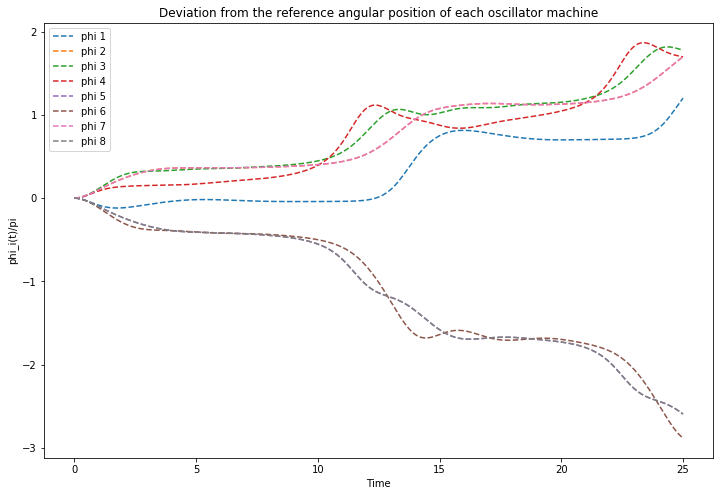

In [7]:
#4. Plotting time domain angular solutions of oscillator network
plt.figure(figsize=(12,8))
plt.plot(t, sol[:, 0]/np.pi, '--', label='phi 1')
plt.plot(t, sol[:, 1]/np.pi, '--', label='phi 2')
plt.plot(t, sol[:, 2]/np.pi, '--', label='phi 3')
plt.plot(t, sol[:, 3]/np.pi, '--', label='phi 4')
plt.plot(t, sol[:, 4]/np.pi, '--', label='phi 5')
plt.plot(t, sol[:, 5]/np.pi, '--', label='phi 6')
plt.plot(t, sol[:, 6]/np.pi, '--', label='phi 7')
plt.plot(t, sol[:, 7]/np.pi, '--', label='phi 8')

plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('phi_i(t)/pi')
plt.title('Deviation from the reference angular position of each oscillator machine');
#plt.savefig('AngPos_.jpg')
#plt.show()

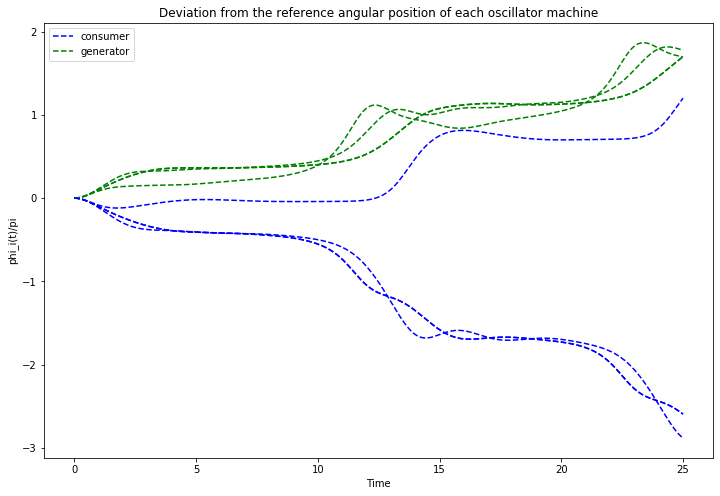

In [8]:
#5. Plotting time domain angular solutions of oscillator network
plt.figure(figsize=(12,8))
plt.plot(t, sol[:, 0]/np.pi, '--', color='b', label='consumer')
plt.plot(t, sol[:, 1]/np.pi, '--', color='g', label='generator')
plt.plot(t, sol[:, 2]/np.pi, '--', color='g')
plt.plot(t, sol[:, 3]/np.pi, '--', color='g')
plt.plot(t, sol[:, 4]/np.pi, '--', color='b')
plt.plot(t, sol[:, 5]/np.pi, '--', color='b')
plt.plot(t, sol[:, 6]/np.pi, '--', color='g')
plt.plot(t, sol[:, 7]/np.pi, '--', color='b')

plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('phi_i(t)/pi')
plt.title('Deviation from the reference angular position of each oscillator machine');
#plt.savefig('AngPos_4c_no_sync.jpg')
#plt.show()

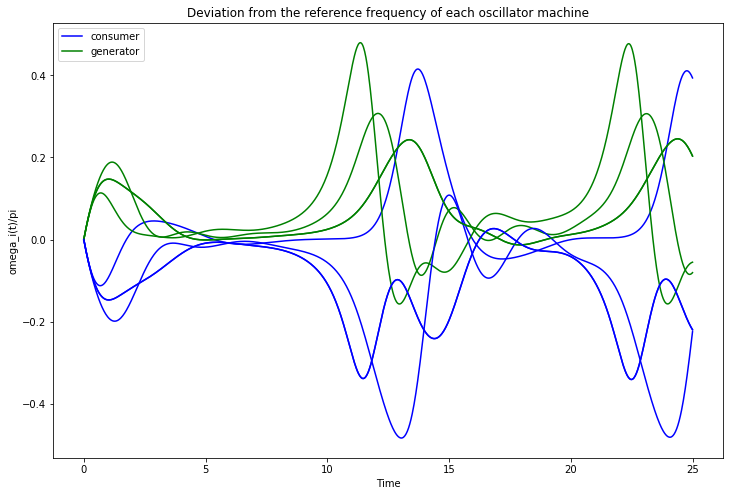

In [11]:
#6. Plotting time domain frequency solutions of oscillator network
#plt.figure(figsize=(12,8))
#plt.plot(t, sol[:, 8]/np.pi, '--', label='omega 1')
#plt.plot(t, sol[:, 9]/np.pi, '--', label='omega 2')
#plt.plot(t, sol[:, 10]/np.pi, '--', label='omega 3')
#plt.plot(t, sol[:, 11]/np.pi, '--', label='omega 4')
#plt.plot(t, sol[:, 12]/np.pi, '--', label='omega 5')
#plt.plot(t, sol[:, 13]/np.pi, '--', label='omega 6')
#plt.plot(t, sol[:, 14]/np.pi, '--', label='omega 7')
#plt.plot(t, sol[:, 15]/np.pi, '--', label='omega 8')

plt.figure(figsize=(12,8))
plt.plot(t, sol[:, 8]/np.pi, color='b', label='consumer')
plt.plot(t, sol[:, 9]/np.pi, color='g', label='generator')
plt.plot(t, sol[:, 10]/np.pi, color='g')
plt.plot(t, sol[:, 11]/np.pi, color='g')
plt.plot(t, sol[:, 12]/np.pi, color='b')
plt.plot(t, sol[:, 13]/np.pi, color='b')
plt.plot(t, sol[:, 14]/np.pi, color='g')
plt.plot(t, sol[:, 15]/np.pi, color='b')

plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('omega_i(t)/pi')
plt.title('Deviation from the reference frequency of each oscillator machine');
#plt.savefig('Freq_4b_no_sync.jpg')
#plt.show()

In [84]:
#7. Exporting data to CSV
df = pd.DataFrame({'Time': t,
                   'Phi 1': sol[:,0], 'Phi 2': sol[:,1], 'Phi 3': sol[:,2], 'Phi 4': sol[:,3],
                   'Phi 5': sol[:,4], 'Phi 6': sol[:,5], 'Phi 7': sol[:,6], 'Phi 8': sol[:,7],
                   'Omega 1': sol[:,8], 'Omega 2': sol[:,9], 'Omega 3': sol[:,10], 'Omega 4': sol[:,11],
                   'Omega 5': sol[:,12], 'Omega 6': sol[:,13], 'Omega 7': sol[:,14], 'Omega 8': sol[:,15]})
#df.to_excel('oscillator_data.xlsx', sheet_name='sheet1', index=False)

In [85]:
#PART 2- STABILITY ANALYSIS AROUND FIXED POINT

In [86]:
#1. Defining system of equations to find fixed point
def func(X, K, P, alpha):
    
    # i = node under consideration
    # j = coupled node
    
    # preallocating vectors
    coupling = np.zeros((8,1))
    
    # calculating coupling term of each omega equation
    for a in range(len(coupling)):
        for b in range(len(coupling)):
            coupling[a] = coupling[a] + K[a,b]*np.sin(X[b]-X[a])

    # phi_0, ..., phi_7, omega_0, ..., omega_7  = X #unpacking state vector
    Y = [.0]*16 # list of equations
    
    # system of equations to be solved
    Y[0] = X[8]
    Y[1] = X[9]
    Y[2] = X[10]
    Y[3] = X[11]
    Y[4] = X[12]
    Y[5] = X[13]
    Y[6] = X[14]
    Y[7] = X[15]
    Y[8] =  P[0] + coupling[0] - alpha*X[8]   
    Y[9] =  P[1] + coupling[1] - alpha*X[9]   
    Y[10] = P[2] + coupling[2] - alpha*X[10]  
    Y[11] = P[3] + coupling[3] - alpha*X[11]  
    Y[12] = P[4] + coupling[4] - alpha*X[12]  
    Y[13] = P[5] + coupling[5] - alpha*X[13]  
    Y[14] = P[6] + coupling[6] - alpha*X[14]  
    Y[15] = P[7] + coupling[7] - alpha*X[15]      
    
    return Y

In [87]:
#2. Solving equations to find fixed points
init = [.0]*16
init[0:8] = [.4]*8
fp = root(func, init, method='lm', args=(K,P,alpha)) # finding fixed point of system of equations
fixed_point = fp.x
message = fp.message # describes cause of algo termination
success = fp.success # Boolean flag indicating if the algorithm exited successfully
print("Fixed point:\n",fixed_point,"\n")
print("Message: ", message)
print("Success: ", success)
# method='lm',
# different methods and initial conditions find different fixed points. All fixed points have the frequency as zero and
# varying phases. This is as expected from the analytical analysis

Fixed point:
 [-5.36167790e-01  6.55764103e-01  6.20796029e-01  7.88816269e-02
 -1.59008080e+00 -1.62695809e+00  6.55764103e-01 -1.59008080e+00
 -9.20938022e-19 -1.37674827e-18 -5.13976774e-19 -7.61903263e-19
 -8.74733469e-19 -1.14959770e-20 -1.69518226e-20  1.10023651e-20] 

Message:  Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
Success:  True


In [88]:
#4. Computing system dynamics starting from the fixed point
x0 = fixed_point
t = np.linspace(0, 25, 1000) #time span
sol = odeint(oscillator_model, x0, t, args=(K,P,alpha)) #solver

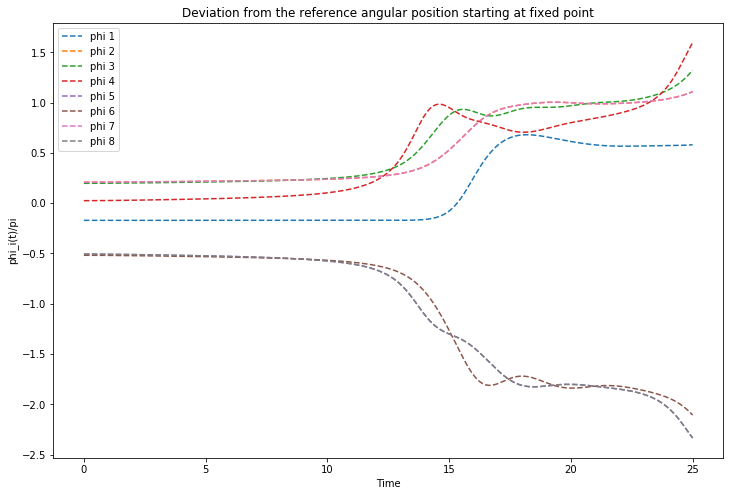

In [89]:
#5. Plotting time domain angular solutions of oscillator network starting from fixed point
plt.figure(figsize=(12,8))
plt.plot(t, sol[:, 0]/np.pi, '--', label='phi 1')
plt.plot(t, sol[:, 1]/np.pi, '--', label='phi 2')
plt.plot(t, sol[:, 2]/np.pi, '--', label='phi 3')
plt.plot(t, sol[:, 3]/np.pi, '--', label='phi 4')
plt.plot(t, sol[:, 4]/np.pi, '--', label='phi 5')
plt.plot(t, sol[:, 5]/np.pi, '--', label='phi 6')
plt.plot(t, sol[:, 6]/np.pi, '--', label='phi 7')
plt.plot(t, sol[:, 7]/np.pi, '--', label='phi 8')

plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('phi_i(t)/pi')
plt.title('Deviation from the reference angular position starting at fixed point');
#plt.savefig('AngPos_4c_fp.jpg')
#plt.show()

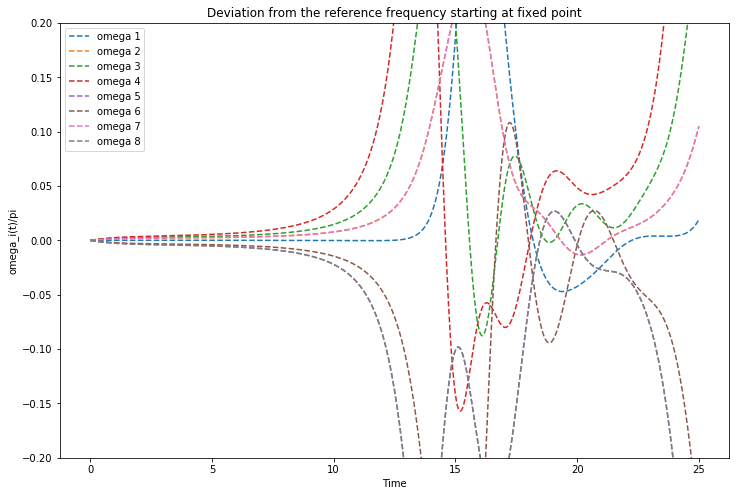

In [90]:
#6. Plotting time domain frequency solutions of oscillator network starting from fixed point
plt.figure(figsize=(12,8))
plt.ylim((-.2,.2))
plt.plot(t, sol[:, 8]/np.pi, '--', label='omega 1')
plt.plot(t, sol[:, 9]/np.pi, '--', label='omega 2')
plt.plot(t, sol[:, 10]/np.pi, '--', label='omega 3')
plt.plot(t, sol[:, 11]/np.pi, '--', label='omega 4')
plt.plot(t, sol[:, 12]/np.pi, '--', label='omega 5')
plt.plot(t, sol[:, 13]/np.pi, '--', label='omega 6')
plt.plot(t, sol[:, 14]/np.pi, '--', label='omega 7')
plt.plot(t, sol[:, 15]/np.pi, '--', label='omega 8')


plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('omega_i(t)/pi')
plt.title('Deviation from the reference frequency starting at fixed point');
#plt.savefig('Freq_4c_fp.jpg')
#plt.show()

In [91]:
#4.Linearizing system around fixed point
def ss_analysis(x, t, K, alpha, fp):

    # i = node under consideration
    # j = coupled node
    
    # preallocating Laplacian matrix
    L = np.zeros((K.shape[0],K.shape[1]))
    
    # calculating each Laplacian term
    for i in range(L.shape[0]):
        for j in range(L.shape[1]):
            if i!=j:
                L[i,j] = -K[i,j]*np.cos(fp[i] - fp[j])
            else:
                for k in range(L.shape[1]):
                    if k==i:
                        continue
                    L[i,j] = L[i,j] + K[i,k]*np.cos(fp[i] - fp[k])
    
    # converting system of equations into matrix form
    zero = np.zeros((8,8))
    one = np.eye(8)
    A = alpha*np.eye(8) # damping matrix- parameter is same for all nodes
    
    # joining matrices into one large system
    J1 = np.concatenate((zero, -L))
    J2 = np.concatenate((one, -A))
    J = np.concatenate((J1, J2), axis=1)
    #print(J1,"\n\n")
    # system of equations to be solved
    dxdt =  np.matmul(J,x)
    
    return dxdt

In [92]:
#5. Use a package to solve the differential equation for 25 time units
x0 = [.0]*16
x0[0], x0[2], x0[12] = [-.03, .05, .010]
t = np.linspace(0, 25, 1000) #time span
fp_tup = tuple(fixed_point)
sol_x = odeint(ss_analysis, x0, t, args=(K,alpha,fp_tup,)) #solver

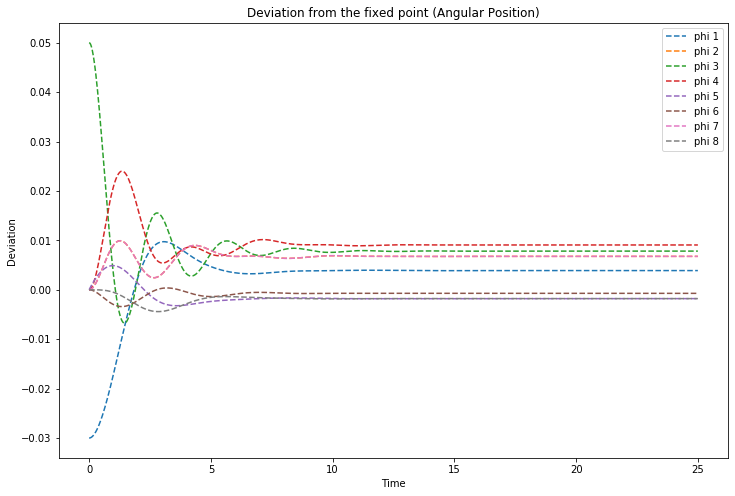

In [93]:
#6. Plotting deviations from fixed point (angular position states)
plt.figure(figsize=(12,8))
plt.plot(t, sol_x[:, 0], '--', label='phi 1')
plt.plot(t, sol_x[:, 1], '--', label='phi 2')
plt.plot(t, sol_x[:, 2], '--', label='phi 3')
plt.plot(t, sol_x[:, 3], '--', label='phi 4')
plt.plot(t, sol_x[:, 4], '--', label='phi 5')
plt.plot(t, sol_x[:, 5], '--', label='phi 6')
plt.plot(t, sol_x[:, 6], '--', label='phi 7')
plt.plot(t, sol_x[:, 7], '--', label='phi 8')

plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Deviation')
plt.title('Deviation from the fixed point (Angular Position)');
#plt.savefig('Freq.jpg')
#plt.show()

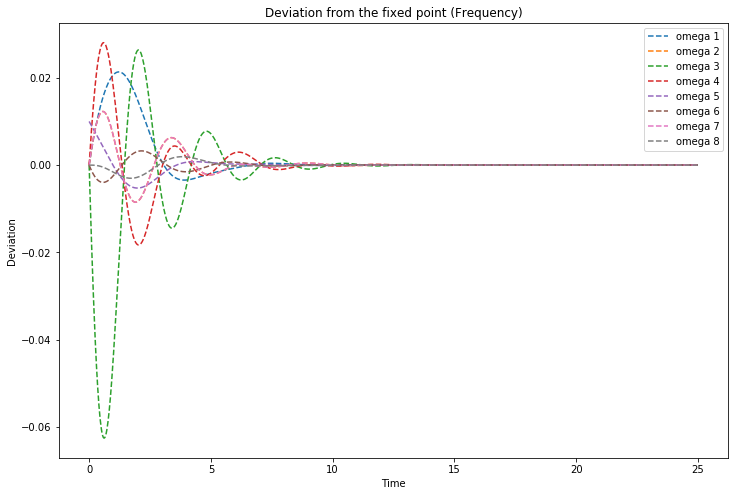

In [94]:
#7. Plotting deviations from fixed point (frequency states)
plt.figure(figsize=(12,8))
plt.plot(t, sol_x[:, 8], '--', label='omega 1')
plt.plot(t, sol_x[:, 9], '--', label='omega 2')
plt.plot(t, sol_x[:, 10], '--', label='omega 3')
plt.plot(t, sol_x[:, 11], '--', label='omega 4')
plt.plot(t, sol_x[:, 12], '--', label='omega 5')
plt.plot(t, sol_x[:, 13], '--', label='omega 6')
plt.plot(t, sol_x[:, 14], '--', label='omega 7')
plt.plot(t, sol_x[:, 15], '--', label='omega 8')

plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Deviation')
plt.title('Deviation from the fixed point (Frequency)');
#plt.savefig('Freq.jpg')
#plt.show()

In [95]:
#8. Finds eigenvalues of the Laplacian and Jacobian. Returns ordered arrays with imaginary component removed
def find_eigs(K, alpha, fp):

    # i = node under consideration
    # j = coupled node
    
    # preallocating vectors
    L = np.zeros((8,8)) # Laplacian
    
    # calculating each Laplacian term
    for i in range(L.shape[0]):
        for j in range(L.shape[1]):
            if i!=j:
                L[i,j] = -K[i,j]*np.cos(fp[i] - fp[j])
            else:
                for k in range(L.shape[1]):
                    if k==i:
                        continue
                    L[i,j] = L[i,j] + K[i,k]*np.cos(fp[i] - fp[k])
    
    # converting system of equations into matrix form
    zero = np.zeros((8,8))
    one = np.eye(8)
    A = alpha*np.eye(8) # damping parameter is same for all nodes
    
    # joining matrices into one large system
    J1 = np.concatenate((zero, -L))
    J2 = np.concatenate((one, -A))
    J = np.concatenate((J1, J2), axis=1)
    
    # computing eigenvalues
    eig_L = np.linalg.eig(L)
    eig_J = np.linalg.eig(J)
    
    # extracting eigenvalues
    eig_L = eig_L[0]
    eig_J = eig_J[0]
    
    # converting to numpy arrays
    eig_L = np.asarray(eig_L)
    eig_J = np.asarray(eig_J)
    
    # sorting laplacian eigenvalues into ascending order
    eig_L.sort()
    
    # removing imaginary component and sorting, only order of eigenvalues without imaginary component matters
    # the linked eigenvalues without imaginary components will be at opposite ends of the array 
    eig_J = eig_J.real
    eig_J.sort()
    
    # splitting array into two and reordering the second part of the array such that the same index maps to the same
    # Laplacian eigenvalue
    eig_J1 = eig_J[0:L.shape[0]]
    eig_J2 = eig_J[L.shape[0+1]:len(eig_J)]
    eig_J2 = sorted(eig_J2,reverse=True)
    
    # combining into one nx2 matrix
    eig_J = np.asarray([eig_J1, eig_J2])
    
    return eig_L, eig_J

In [96]:
#9. Storing eigenvalues of laplacian and jacobian
eig_L_comp, eig_J_comp = find_eigs(K, alpha, fixed_point)

print("Eigenvalues of Laplacian:\n", eig_L_comp, "\n")
print("Eigenvalues of Jacobian:\n", eig_J_comp, "\n")

Eigenvalues of Laplacian:
 [-7.04573355e-07  2.28917324e-16  9.28350948e-01  1.03154646e+00
  1.41033198e+00  1.75161928e+00  3.47689810e+00  5.23695990e+00] 

Eigenvalues of Jacobian:
 [[-1.00000070e+00 -1.00000000e+00 -5.00000000e-01 -5.00000000e-01
  -5.00000000e-01 -5.00000000e-01 -5.00000000e-01 -5.00000000e-01]
 [ 7.04572859e-07  3.61176543e-16 -5.00000000e-01 -5.00000000e-01
  -5.00000000e-01 -5.00000000e-01 -5.00000000e-01 -5.00000000e-01]] 



In [97]:
#11. Function for computing real part of eiq_J as a function of eig_L
def calc_eig(eig_L, alpha):
    J_plus = -0.5*alpha + 0.5*cmath.sqrt(alpha**2 -4*eig_L)
    J_minus = -0.5*alpha - 0.5*cmath.sqrt(alpha**2 -4*eig_L)
    return [J_plus.real, J_minus.real]

In [98]:
#12. Computing real part of eiq_J as a function of eig_L
eig_L_calc = np.linspace(-1,4.5,600)
eig_J_calc = [.0]*len(eig_L_calc)
for i in range(len(eig_L_calc)):
    eig_J_calc[i] = calc_eig(eig_L_calc[i], alpha)
eig_J_calc = np.asarray(eig_J_calc)

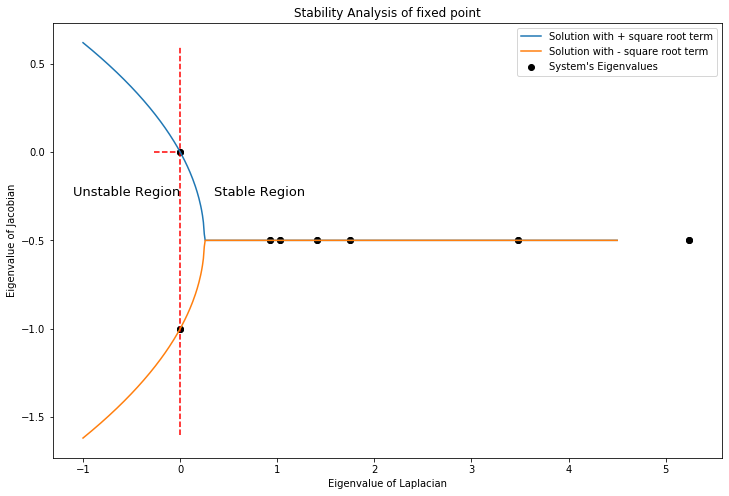

In [99]:
#13. Plotting eiq_J as a function of eig_L
plt.figure(figsize=(12,8))
plt_zero = eig_L_calc[80:105]
plt.plot(plt_zero, np.zeros(len(plt_zero)), '--', color='r')
plt.plot(np.zeros(len(eig_L_calc)),np.linspace(-1.6, .6, len(eig_L_calc)) , '--', color='r')
plt.plot(eig_L_calc, eig_J_calc[:,0], label="Solution with + square root term")
plt.plot(eig_L_calc, eig_J_calc[:,1], label="Solution with - square root term")
plt.scatter(eig_L_comp, eig_J_comp[0], color='k', label="System's Eigenvalues")
plt.scatter(eig_L_comp, eig_J_comp[1], color='k')

plt.text(.35, -.25, r'Stable Region', fontsize=13)
plt.text(-1.1, -.25, r'Unstable Region', fontsize=13)
plt.legend(loc='best')
plt.xlabel('Eigenvalue of Laplacian')
plt.ylabel('Eigenvalue of Jacobian')
plt.title('Stability Analysis of fixed point');
#plt.savefig('Eigenvals_4c.jpg')
#plt.show()